<a href="https://colab.research.google.com/github/smitasasindran/era4/blob/session4/ERA4_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

2. Check GPU

In [2]:
cuda = torch.cuda.is_available()
print(f"CUDA Available: {cuda}")

CUDA Available: False


3. Create transformations

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # transforms.Resize((28, 28)),
    # transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1407,), (0.4081,))
    transforms.Normalize((0.1307,), (0.3081,)),
])

4. Get train and test data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9.91M/9.91M [00:00<00:00, 60.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.15MB/s]


5. Create data loaders

In [5]:
batch_size = 512
# batch_size=256
# kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

6. Plot some data

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


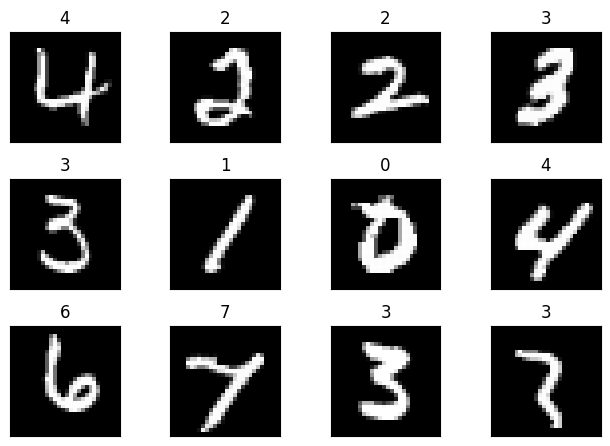

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])


7. Create the model

In [ ]:
# class Net(nn.Module):
#     # Define the structure of the NN

#     def __init__(self):
#         super(Net, self).__init__()

#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
#         self.conv4 = nn.Conv2d(128, 128, kernel_size=3)
#         # self.fc1 = nn.Linear(320, 50)
#         self.fc1 = nn.Linear(2048, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(self.conv1(x), 2)        # 512 x 32 x 26 x 26
#         x = F.relu(F.max_pool2d(self.conv2(x), 2))  # 512 x 64 x 12 x 12 maxpool
#         x = F.relu(self.conv3(x), 2)                # 512 x 128 x 10 x 10
#         x = F.relu(F.max_pool2d(self.conv4(x), 2))  # 512 x 128 x 4 x 4 after maxpool
#         print(f"Size after conv4 and maxpool: {x.shape}")
#         # x = x.view(-1, 320)
#         x = x.view(-1, 2048)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)



In [ ]:
# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()

#         self.conv1 = nn.Conv2d(1, 8, kernel_size=3)     # 512 x  8 x 26 x 26
#         self.conv2 = nn.Conv2d(8, 16, kernel_size=3)    # 512 x 16 x 24 x 24
#         # max pool ->                                   # 512 x 16 x 12 x 12
#         self.conv3 = nn.Conv2d(16, 32, kernel_size=3)   # 512 x 32 x 10 x 10
#         self.conv4 = nn.Conv2d(32, 64, kernel_size=3)   # 512 x 64 x 8 x 8
#         self.conv5 = nn.Conv2d(64, 64, kernel_size=3)   # 512 x 64 x 6 x 6
#         # max pool ->                                   # 512 x 64 x 3 x 3
#         self.conv6 = nn.Conv2d(64, 64, kernel_size=3)   # 512 x 64 x 1 x 1
#         self.conv7 = nn.Conv2d(64, 10, kernel_size=1)   # 512 x 10 x 1 x 1


#     def forward(self, x):               # x = 512 x 1 x 28 x 28
#         x = F.relu(self.conv1(x))       # 512 x 8 x 26 x 26
#         x = F.relu(self.conv2(x))       # 512 x 16 x 24 x 24
#         x = F.max_pool2d(x, 2)
#         # print(f"Size after conv1,conv2, maxpool1: {x.shape}")

#         x = F.relu(self.conv3(x))
#         x = F.relu(self.conv4(x))
#         x = F.relu(self.conv5(x))
#         x = F.max_pool2d(x, 2)
#         # print(f"Size after conv3,conv4, conv5, maxpool2: {x.shape}")

#         x = F.relu(self.conv6(x))
#         x = self.conv7(x)
#         # print(f"Size after conv6,conv7: {x.shape}")

#         x = x.view(-1, 10) # Should be 512 x 10

#         # return F.log_softmax(x, dim=1)   # Cross entropy loss already does softmax
#         return x



In [35]:
# ##Not so good...

# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()

#         self.conv1 = nn.Conv2d(1, 8, kernel_size=3)     # 512 x  8 x 26 x 26
#         self.conv2 = nn.Conv2d(8, 16, kernel_size=3)    # 512 x 16 x 24 x 24
#         self.conv3 = nn.Conv2d(16, 32, kernel_size=3)   # 512 x 32 x 22 x 22
#         # max pool ->                                   # 512 x 32 x 11 x 11

#         self.conv4 = nn.Conv2d(32, 64, kernel_size=3)   # 512 x 64 x 9 x 9
#         self.conv5 = nn.Conv2d(64, 64, kernel_size=3)   # 512 x 64 x 7 x 7
#         self.conv6 = nn.Conv2d(64, 8, kernel_size=1)    # 512 x 8 x 7 x 7

#         self.conv7 = nn.Conv2d(8, 16, kernel_size=3)   # 512 x 16 x 5 x 5
#         self.conv8 = nn.Conv2d(16, 32, kernel_size=3)   # 512 x 32 x 3 x 3
#         self.conv9 = nn.Conv2d(32, 10, kernel_size=3)   # 512 x 10 x 1 x 1


#     def forward(self, x):               # x = 512 x 1 x 28 x 28
#         x = F.relu(self.conv1(x))       # 512 x 8 x 26 x 26
#         x = F.relu(self.conv2(x))       # 512 x 16 x 24 x 24
#         x = F.relu(self.conv3(x))
#         x = F.max_pool2d(x, 2)
#         # print(f"Size after conv1,conv2,conv3 maxpool1: {x.shape}")

#         x = F.relu(self.conv4(x))
#         x = F.relu(self.conv5(x))
#         x = F.relu(self.conv6(x))
#         # print(f"Size after conv4, conv5, conv6: {x.shape}")

#         x = F.relu(self.conv7(x))
#         x = F.relu(self.conv8(x))
#         x = self.conv9(x)
#         # print(f"Size after conv7,conv8, conv9: {x.shape}")

#         x = x.view(-1, 10) # Should be 512 x 10

#         # return F.log_softmax(x, dim=1)   # Cross entropy loss already does softmax
#         return x



In [7]:
##Not so good...

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)     # 512 x  8 x 26 x 26
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)    # 512 x 16 x 24 x 24
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3)   # 512 x 32 x 22 x 22
        # max pool ->                                   # 512 x 32 x 11 x 11

        self.conv4 = nn.Conv2d(32, 32, kernel_size=3)   # 512 x 64 x 9 x 9
        self.conv5 = nn.Conv2d(32, 32, kernel_size=3)   # 512 x 64 x 7 x 7
        self.conv6 = nn.Conv2d(32, 8, kernel_size=3)    # 512 x 8 x 5 x 5

        self.conv7 = nn.Conv2d(8, 16, kernel_size=3)   # 512 x 16 x 3 x 3
        self.conv8 = nn.Conv2d(16, 10, kernel_size=3)   # 512 x 32 x 1 x 1
        # self.conv9 = nn.Conv2d(32, 10, kernel_size=3)   # 512 x 10 x 1 x 1


    def forward(self, x):               # x = 512 x 1 x 28 x 28
        x = F.relu(self.conv1(x))       # 512 x 8 x 26 x 26
        x = F.relu(self.conv2(x))       # 512 x 16 x 24 x 24
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        # print(f"Size after conv1,conv2,conv3 maxpool1: {x.shape}")

        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        # print(f"Size after conv4, conv5, conv6: {x.shape}")

        x = F.relu(self.conv7(x))
        x = self.conv8(x)
        # x = self.conv9(x)
        # print(f"Size after conv7,conv8, conv9: {x.shape}")

        x = x.view(-1, 10) # Should be 512 x 10

        # return F.log_softmax(x, dim=1)   # Cross entropy loss already does softmax
        return x



8. Initializing variables

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

9. Train and test functions

In [9]:
from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer, criterion):
    model.train()
    pbar = tqdm(train_loader)

    train_loss = 0
    correct = 0
    processed = 0

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        # Predict
        pred = model(data)

        # Calculate loss
        loss = criterion(pred, target)

        train_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

        correct += GetCorrectPredCount(pred, target)
        processed += len(data)

        pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

    train_acc.append(100 * correct / processed)
    train_losses.append(train_loss / len(train_loader))


def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            # test_loss += criterion(output, target, reduction='sum').item() # Sum up batch loss
            test_loss += criterion(output, target).item() # Sum up batch loss

            correct += GetCorrectPredCount(output, target)

    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


10. Create the model

In [10]:
from torchsummary import summary

device = "cuda" if cuda else "cpu"
#device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)

summary(model, input_size=(1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
            Conv2d-2           [-1, 16, 24, 24]           1,168
            Conv2d-3           [-1, 32, 22, 22]           4,640
            Conv2d-4             [-1, 32, 9, 9]           9,248
            Conv2d-5             [-1, 32, 7, 7]           9,248
            Conv2d-6              [-1, 8, 5, 5]           2,312
            Conv2d-7             [-1, 16, 3, 3]           1,168
            Conv2d-8             [-1, 10, 1, 1]           1,450
Total params: 29,314
Trainable params: 29,314
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.26
Params size (MB): 0.11
Estimated Total Size (MB): 0.38
----------------------------------------------------------------


11. Train the model

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)

# criterion = nn.CrossEntropyLoss(reduction='mean')
criterion = nn.CrossEntropyLoss()
num_epochs = 3

for epoch in range(1, num_epochs+1):
    print(f"Epoch {epoch}")
    train(model, device, train_loader, optimizer, criterion)
    test(model, device, test_loader, criterion)
    scheduler.step()

Epoch 1


Train: Loss=2.3019 Batch_id=117 Accuracy=11.01: 100%|██████████| 118/118 [01:01<00:00,  1.91it/s]


Test set: Average loss: 0.0046, Accuracy: 1135/10000 (11.35%)

Epoch 2


Train: Loss=1.5605 Batch_id=117 Accuracy=19.79: 100%|██████████| 118/118 [01:01<00:00,  1.91it/s]


Test set: Average loss: 0.0025, Accuracy: 6140/10000 (61.40%)

Epoch 3


Train: Loss=0.2692 Batch_id=117 Accuracy=81.88: 100%|██████████| 118/118 [01:01<00:00,  1.93it/s]


Test set: Average loss: 0.0006, Accuracy: 9102/10000 (91.02%)



12. Train and Test curves

Text(0.5, 1.0, 'Test Accuracy')

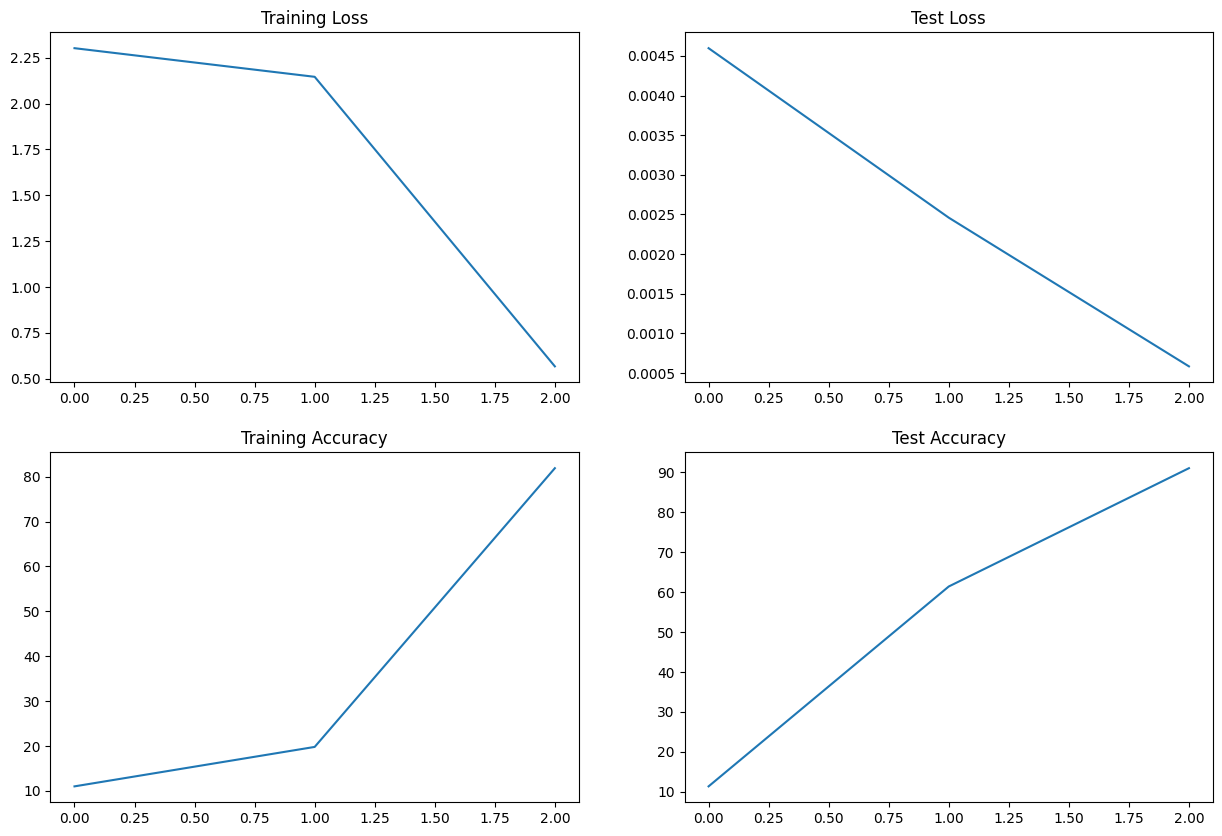

In [12]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")